# This program does the visualization and save the figures.

## Use the separately csv files of the county to manipulate the data.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
county = "Taoyuan_City"
path = f"../data/processed/{county}.csv"

try:
    df = pd.read_csv(path)
    df["date"] = pd.to_datetime(df["date"])
except FileNotFoundError:
    print("Can't find the county name.")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448718 entries, 0 to 448717
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       448712 non-null  datetime64[ns]
 1   sitename   448718 non-null  object        
 2   county     448718 non-null  object        
 3   aqi        444907 non-null  float64       
 4   pollutant  172011 non-null  object        
 5   status     440631 non-null  object        
 6   so2        437485 non-null  float64       
 7   co         438726 non-null  float64       
 8   o3         439857 non-null  float64       
 9   o3_8hr     443907 non-null  float64       
 10  pm10       438087 non-null  float64       
 11  pm2.5      434029 non-null  float64       
 12  no2        435852 non-null  float64       
 13  nox        435605 non-null  float64       
 14  no         435612 non-null  float64       
 15  windspeed  440595 non-null  float64       
 16  winddirec  440668 no

In [5]:
# We don't need the county name, drop it off.
df = df.drop(columns="county")

In [6]:
# Let's check the NaN first
df.isna().sum()

date              6
sitename          0
aqi            3811
pollutant    276707
status         8087
so2           11233
co             9992
o3             8861
o3_8hr         4811
pm10          10631
pm2.5         14689
no2           12866
nox           13113
no            13106
windspeed      8123
winddirec      8050
co_8hr         5946
pm2.5_avg      6371
pm10_avg       6777
so2_avg       50747
siteid       138255
dtype: int64

In [7]:
# We can make a copy avoiding changing the original data.
df_copy = df.copy()

In [8]:
# Set the time period and site
start_time = "2024-08-01"
end_time = ""
site = "Taoyuan"

# Catch the data in the time period and matching sitename
df_plot = df_copy[df_copy["date"] > start_time]
df_plot[
    df_plot["sitename"] == site
    ]

# create a day column to save the day
df_plot["day"] = df_plot["date"].dt.date
df_plot

C:\Users\dinni\AppData\Local\Temp\ipykernel_27732\2909203565.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["day"] = df_plot["date"].dt.date


,date,sitename,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,nox,no,windspeed,winddirec,co_8hr,pm2.5_avg,pm10_avg,so2_avg,siteid,day
0,2024-08-31 23:00:00,Pingzhen,58.0,PM2.5,Moderate,0.1,0.24,23.3,38.5,29.0,...,10.5,0.7,1.2,252.0,0.3,18.2,32.0,0.0,20.0,2024-08-31
1,2024-08-31 23:00:00,Longtan,60.0,PM2.5,Moderate,1.8,0.18,26.9,42.3,26.0,...,5.2,0.6,2.9,217.0,0.2,19.2,31.0,2.0,21.0,2024-08-31
2,2024-08-31 23:00:00,Guanyin,65.0,PM2.5,Moderate,1.4,0.13,30.6,38.7,24.0,...,8.3,0.3,1.2,224.0,0.1,21.3,32.0,1.0,19.0,2024-08-31
3,2024-08-31 23:00:00,Dayuan,59.0,PM2.5,Moderate,1.0,0.27,25.7,39.2,25.0,...,13.3,0.9,1.8,230.0,0.2,18.7,29.0,1.0,18.0,2024-08-31
4,2024-08-31 23:00:00,Taoyuan,55.0,PM2.5,Moderate,0.8,0.24,28.9,46.6,20.0,...,8.9,0.9,1.4,209.0,0.3,17.0,27.0,1.0,17.0,2024-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,2024-08-01 01:00:00,Guanyin,30.0,NaN,Good,1.0,0.09,15.8,19.3,9.0,...,5.7,0.7,4.4,255.0,0.0,9.2,13.0,NaN,19.0,2024-08-01
4454,2024-08-01 01:00:00,Taoyuan,33.0,NaN,Good,2.3,0.45,1.8,8.2,18.0,...,22.7,1.8,0.7,200.0,0.4,9.3,16.0,1.0,17.0,2024-08-01
4455,2024-08-01 01:00:00,Dayuan,20.0,NaN,Good,0.8,0.17,12.0,15.0,13.0,...,9.2,0.1,1.4,200.0,0.2,6.3,14.0,0.0,18.0,2024-08-01
4456,2024-08-01 01:00:00,Longtan,27.0,NaN,Good,1.2,0.18,6.8,10.3,20.0,...,9.1,2.2,1.3,142.0,0.2,8.2,16.0,1.0,21.0,2024-08-01


Figure has been saved.


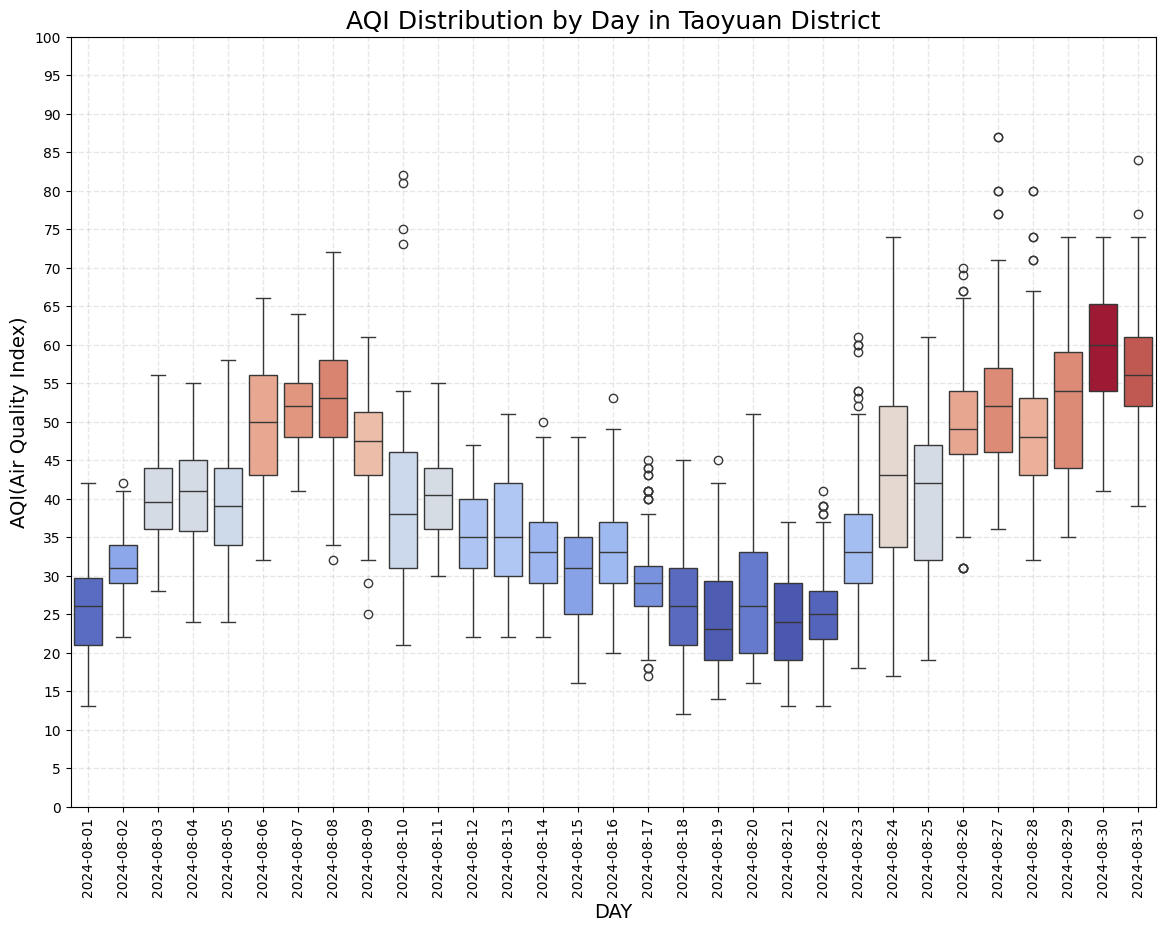

In [42]:
# Ascending the data via day
df_plot = df_plot.sort_values(by="day", ascending=True)

# Build the color corresponding to the aqi
df_mean = df_plot.groupby("day", as_index=False)["aqi"].mean()

# Normalize will standardize the column value between 0 to 1
norm = plt.Normalize(df_mean["aqi"].min(), df_mean["aqi"].max())

# as_cmap makes the sns palette to colormap
colors = sns.color_palette("coolwarm", as_cmap=True)(norm(df_mean["aqi"]))

# Draw the Boxplot
plt.figure(figsize=(14, 10))
ax = sns.boxplot(
    data=df_plot,
    x="day",
    y="aqi",
    # dict create a "day" -> color form
    palette=dict(zip(df_mean["day"], colors)),
    hue="day",
    legend=False,
)
plt.xticks(rotation=90)
plt.xlabel("DAY", fontsize=14)
plt.ylabel("AQI(Air Quality Index)", fontsize=14)
plt.ylim((0, 100))
plt.yticks(np.arange(0, 101, 5))
plt.title("AQI Distribution by Day in Taoyuan District", fontsize=18)
plt.grid(linestyle="--", linewidth=1, alpha=0.3)

# Save figure
path = f"../figure/{county}_{site}_AQI.png"
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path, dpi=600, bbox_inches="tight")
print("Figure has been saved.")

# show method must stand at the last position
plt.show()